# 《合成孔径雷达成像——算法与实现》第5章 SAR信号的性质

## 距离徙动

距离徙动产生原因是合成孔径雷达的运动平台与目标之间的相对运动。对于地面静止的点目标，当它处于雷达波束照射范围内的时间中时，随着雷达载体的运动，它与雷达载体之间的距离会不断的变化。随着平台的运动，同一个点目标在雷达接收机中的回波会分布在几个相邻的距离门中。我们将合成孔径雷达回波信号的这一特性称为距离徙动。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

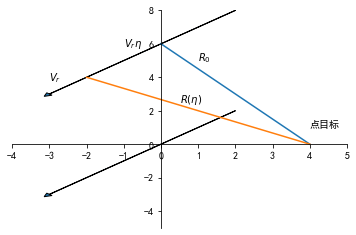

In [26]:
ax = plt.gca()  # get current axis 获得坐标轴对象
ax.spines['right'].set_color('none')  # 将右边 边沿线颜色设置为空 其实就相当于抹掉这条边
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))  # 指定 data 设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim(-4.0, 5.0) #x轴数值设置
plt.ylim(-5, 8)
plt.arrow(2, 2, -5, -5, width = 0.01, head_width=0.2, head_length=0.2, ec ='black') 
plt.arrow(2, 8, -5, -5, width = 0.01, head_width=0.2, head_length=0.2, ec ='black') 
plt.plot([0, 4], [6, 0]),plt.plot([-2, 4], [4, 0])  
plt.text(4,1,'点目标'),plt.text(1,5,'$R_0$'),plt.text(0.5,2.5,'$R(\eta)$'),plt.text(-3,3.8,'$V_r$'),plt.text(-1,5.8,'$V_r\eta$')
plt.show()

如上图，$R_0$是雷达载体距点目标的最近距离，过$\eta$时间后，平台运动了$V_r\eta$的距离，此时平台距离点目标为$R(\eta)$。勾股定理可得到$R(\eta)=\sqrt{R_0^2+V_r^2\eta^2}  \approx R_0 + \frac{V_r^2\eta^2}{2R_0}$。

对$R(\eta)$在波束中心$\eta_c$展开，$R(\eta)=R(\eta_c)-V_r\sin\theta_{r,c}(\eta-\eta_c)+\frac{1}{2}\frac{V_r^2\cos^2\theta_{r,c}}{R(\eta_c)}(\eta-\eta_c)^2$，式中一次项和二次项分别对应距离徙动线性分量和二次分量

In [27]:
from numpy import sin,cos,pi,abs,ceil,sqrt

# 已知参数--》距离向参数
R_eta_c = 850e+3;                       # 景中心斜距
# 已知参数--》方位向参数
Vr = 7100;                              # 等效雷达速度
Ta = 0.64;                              # 目标照射时间
Ka = 2095;                              # 方位向调频率
theta_r_c = -0.3*pi/180;                # 斜视角
# 参数计算
Delta_f_dop = abs(Ka*Ta);               # 方位信号带宽
t_eta_c = -R_eta_c*sin(theta_r_c)/Vr;   # 波束中心穿越时刻
# 参数设置
alpha_a_s = 1;                          # 方位过采样率
Fa = alpha_a_s*Delta_f_dop;             # 方位采样频率PRF
Na = int(2*ceil(Fa*Ta/2));                   # 方位采样点数
dt = Ta/Na;                             # 采样时间间隔
df = Fa/Na;                             # 采样频率间隔 
# 变量设置
t_eta =  np.arange(-Ta/2,Ta/2,dt) + t_eta_c;  # 方位时间变量
# 信号表达
R_eta = R_eta_c - Vr*sin(theta_r_c)*(t_eta-t_eta_c) + (1/2)*(Vr**2*cos(theta_r_c)**2/R_eta_c)*(t_eta-t_eta_c)**2;   # 瞬时斜距展开式
#{
# R_eta = sqrt(R0**2 + Vr**2*eta**2) # 瞬时斜距的双曲线形式                        
# R_eta = R0 + Vr**2*eta**2/(2*R0)  # 瞬时斜距的抛物线形式                
# R_eta = R_eta_c - Vr**2*eta_c/R_eta_c*(eta-eta_c) + (1/2)*(Vr**2*cos(theta_r_c)**2/R_eta_c)*(eta-eta_c)**2;
# R_eta = R_eta_c - Vr*sin(theta_r_c)*(eta-eta_c) + (1/2)*(Vr**2*cos(theta_r_c)**2/R_eta_c)*(eta-eta_c)**2;
#}
RCM_1 = -Vr*sin(theta_r_c)*(t_eta-t_eta_c+Ta/2);                    # 距离徙动线性分量
RCM_2 = (1/2)*(Vr**2*cos(theta_r_c)**2/R_eta_c)*(t_eta-t_eta_c)**2;   # 距离徙动二次分量
RCM_all = RCM_1 + RCM_2;                                            # 距离徙动总量

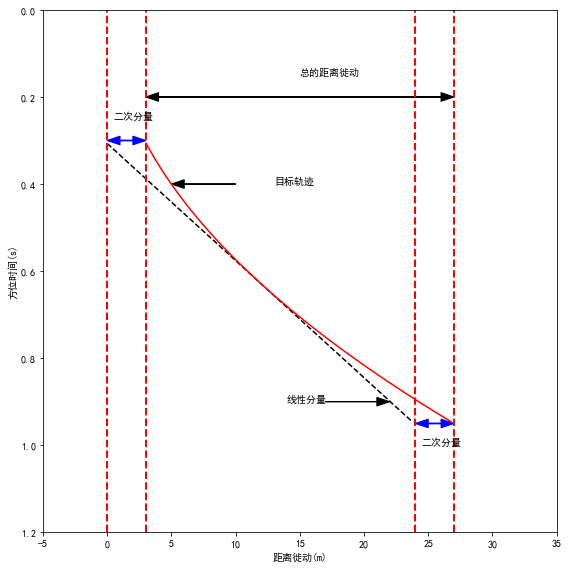

In [36]:
# 绘图
from matplotlib.pyplot import figure,plot,axis,xlabel,ylabel,text,arrow
figure(figsize=(8,8));
axis([-5,35,0,1.2])
plot(RCM_1,t_eta,'k--'),
plot(RCM_all,t_eta,'r'),
plt.gca().invert_yaxis()
xlabel('距离徙动(m)');ylabel('方位时间(s)')
plt.axvline(x=0, c="r", ls="--", lw=2)
plt.axvline(x=3, c="r", ls="--", lw=2)
# line([0,0],[0,1.2],'r--')
# line([3,3],[0,1.2],'r--')
arrow(3,0.2,23,0, width = 0.001, head_width=0.02, head_length=1, facecolor='black',edgecolor ='black');
arrow(27,0.2,-23,0,width = 0.001, head_width=0.02, head_length=1, facecolor='black',edgecolor ='black');
text(15,0.15,'总的距离徙动')
arrow(0,0.3,2,0,width = 0.001, head_width=0.02, head_length=1, facecolor='blue',edgecolor ='blue');
arrow(3,0.3,-2,0,width = 0.001, head_width=0.02, head_length=1, facecolor='blue',edgecolor ='blue');
text(0.5,0.25,'二次分量')
plt.axvline(x=24, c="r", ls="--", lw=2)
plt.axvline(x=27, c="r", ls="--", lw=2)
# line([24,24],[0,1.2],'r--')
# line([27,27],[0,1.2],'r--')
arrow(24,0.95,2,0,width = 0.001, head_width=0.02, head_length=1, facecolor='blue',edgecolor ='blue');
arrow(27,0.95,-2,0,width = 0.001, head_width=0.02, head_length=1, facecolor='blue',edgecolor ='blue');
text(24.5,1,'二次分量')
arrow(10,0.4,-4,0,width = 0.001, head_width=0.02, head_length=1, facecolor='black',edgecolor ='black');
text(13,0.4,'目标轨迹')
arrow(17,0.9,4,0,width = 0.001, head_width=0.02, head_length=1, facecolor='black',edgecolor ='black');
text(14,0.9,'线性分量')

plt.tight_layout()

距离徙动随斜视角变化情况

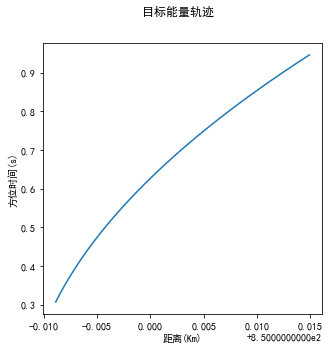

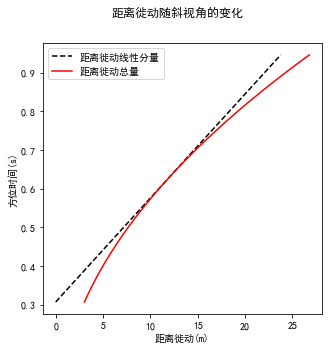

In [35]:
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout
# 绘图
figure(figsize=(5,5));

plot(R_eta/1000,t_eta)
xlabel('距离(Km)'),ylabel('方位时间(s)')
suptitle('目标能量轨迹')
# 绘图                                                                
figure(figsize=(5,5));                                                           
p1 = plot(RCM_1,t_eta,'k--')
p2 = plot(RCM_all,t_eta,'r')
xlabel('距离徙动(m)'),ylabel('方位时间(s)')
suptitle('距离徙动随斜视角的变化')
# 图例
# legend('boxoff');
plt.legend({'距离徙动线性分量','距离徙动总量'});

可见，在小斜视角情况下，总的距离徙动主要由二次分量构成；在大斜视角情况下，总的距离徙动主要由线性分量构成。

### 方位时域距离时域以及方位频域距离时域的目标轨迹

In [37]:
# 已知参数--》距离向参数
R_eta_c_1 = 450;                            # 景中心斜距
R_eta_c_2 = 850;                            # 景中心斜距
R_eta_c_3 = 1250;                           # 景中心斜距
# 已知参数--》方位向参数
c  = 3e+8;                                  # 电磁传播速度
f0 = 5.3e+6;                                # 雷达工作频率
Vr = 7100;                                  # 等效雷达速度
Ta = 0.64;                                  # 目标照射时间
Ka = 2095;                                  # 方位向调频率
theta_r_c = 0*pi/180;                       # 斜视角
# 参数计算
lambda0 = c/f0;                              # 雷达工作波长
R0_1 = R_eta_c_1*cos(theta_r_c);            # 最短斜距
R0_2 = R_eta_c_2*cos(theta_r_c);            # 最短斜距
R0_3 = R_eta_c_3*cos(theta_r_c);            # 最短斜距
Delta_f_dop = abs(Ka*Ta);                   # 方位信号带宽
t_eta_c_1 = -R_eta_c_1*sin(theta_r_c)/Vr;   # 波束中心穿越时刻
t_eta_c_2 = -R_eta_c_2*sin(theta_r_c)/Vr;   # 波束中心穿越时刻
t_eta_c_3 = -R_eta_c_3*sin(theta_r_c)/Vr;   # 波束中心穿越时刻
# 参数设置
alpha_a_s = 1;                              # 方位过采样率
Fa = alpha_a_s*Delta_f_dop;                 # 方位采样频率PRF
Na = int(2*ceil(Fa*Ta/2));                       # 方位采样点数
dt = Ta/Na;                                 # 采样时间间隔
df = Fa/Na;                                 # 采样频率间隔 
# 变量设置
t_eta =  np.arange(-Ta/16,Ta/16,dt);              # 方位时间变量
f_eta =  np.arange(-Fa/16,Fa/16,df);              # 方位频率变量
# 信号表达
R_eta_1 = R0_1 + Vr**2*t_eta**2/(2*R0_1);    # 目标轨迹
R_eta_2 = R0_2 + Vr**2*t_eta**2/(2*R0_2);    # 目标轨迹
R_eta_3 = R0_3 + Vr**2*t_eta**2/(2*R0_3);    # 目标轨迹
# 信号表达                                          
R_rd_1 = R0_1 + lambda0**2*R0_1/(8*Vr**2)*f_eta**2;    # 目标轨迹
R_rd_2 = R0_2 + lambda0**2*R0_2/(8*Vr**2)*f_eta**2;    # 目标轨迹
R_rd_3 = R0_3 + lambda0**2*R0_3/(8*Vr**2)*f_eta**2;    # 目标轨迹


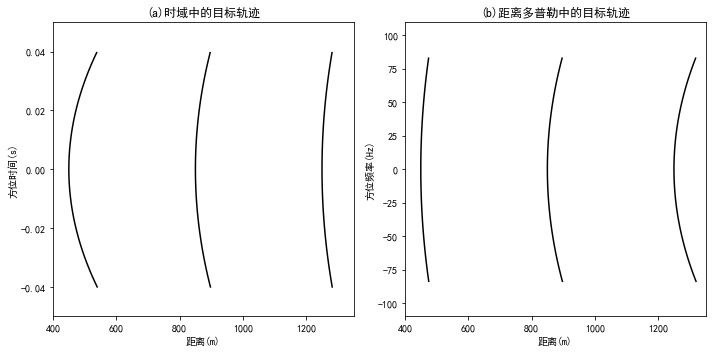

In [38]:
# 绘图
from matplotlib.pyplot import figure,plot,axis,title,xlabel,ylabel,text,arrow

# 绘图      
figure(figsize=(10,5));
plt.subplot(121)
plot(R_eta_1,t_eta,'k')
plot(R_eta_2,t_eta,'k')
plot(R_eta_3,t_eta,'k')
plt.gca().invert_yaxis()
axis([400,1350,-0.05,0.05])
title('(a)时域中的目标轨迹')
xlabel('距离(m)');ylabel('方位时间(s)')
                                                          
plt.subplot(122)                                                     
plot(R_rd_1,f_eta,'k')
plot(R_rd_2,f_eta,'k')
plot(R_rd_3,f_eta,'k')
plt.gca().invert_yaxis()
axis([400,1350,-110,110])
title('(b)距离多普勒中的目标轨迹')
xlabel('距离(m)');ylabel('方位频率(Hz)')
plt.tight_layout()

本文Python代码参照Matlab代码自：https://github.com/wanghs008/SAR-SignalProcessing